*First compiled: September 18, 2017.*

# Robustness of graph abstraction for [Paul *et al.*, Cell (2015)](https://doi.org/10.1016/j.cell.2015.11.013)

Here, we investigate the robustness of the results in [*paul15*](paul15.ipynb).

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy.api as sc
from collections import OrderedDict
import pandas as pd
import seaborn as sns

sc.settings.verbosity = 1                # amount of output
sc.settings.set_figure_params(dpi=80)    # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2.8+18.g1b7c77c.dirty on 2017-09-27 04:42.


In [20]:
adata = sc.read('paul15')
sc.tl.aga(adata, n_neighbors=4, resolution=1.2)
adata_reference = adata.copy()

reading ./write/paul15.h5


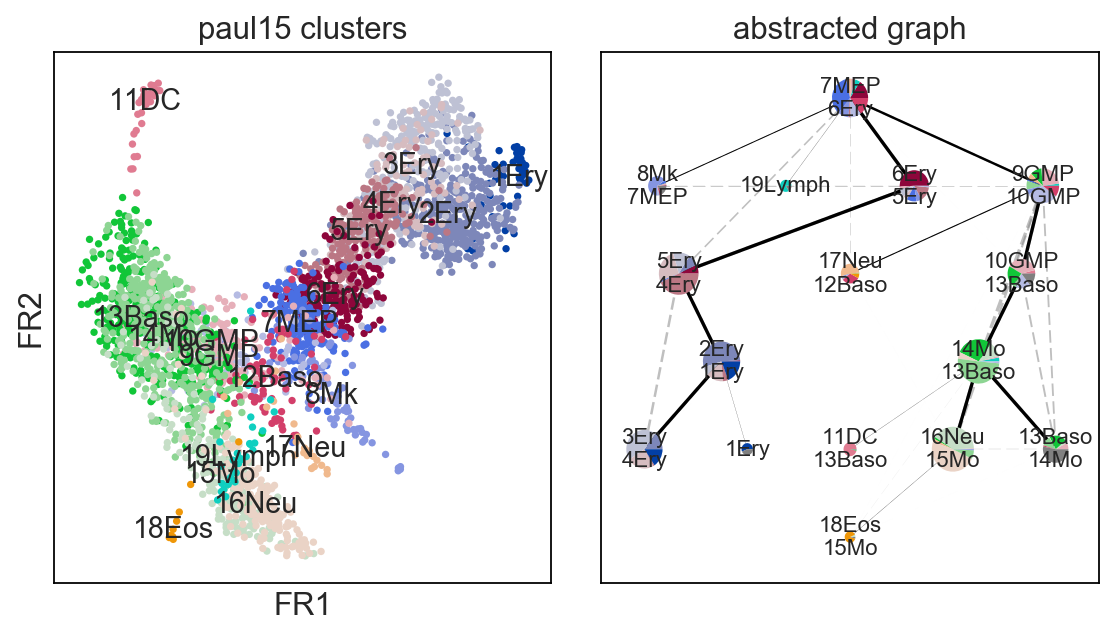

In [21]:
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='aga_groups', reference='paul15_clusters', normalization='reference')
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.default_26, asso_matrix)
axs = sc.pl.aga(adata, color='paul15_clusters', basis='draw_graph_fr', title_graph='abstracted graph',
                palette=sc.pl.palettes.default_26,
                root=0, layout='eq_tree', frameon=True,
                color_graph=asso_colors, groups_graph=asso_names,
                fontsize=10)

### Remove the lymphoid cells as done by [Qiu *et al.*, Nat. Meth. (2017)](https://doi.org/10.1038/nmeth.4402)

In [22]:
adata = adata[~(adata.smp['paul15_clusters'] == '19Lymph')]

Rerun the analysis.

In [26]:
sc.tl.aga(adata, n_neighbors=4, resolution=1.2, recompute_graph=True)

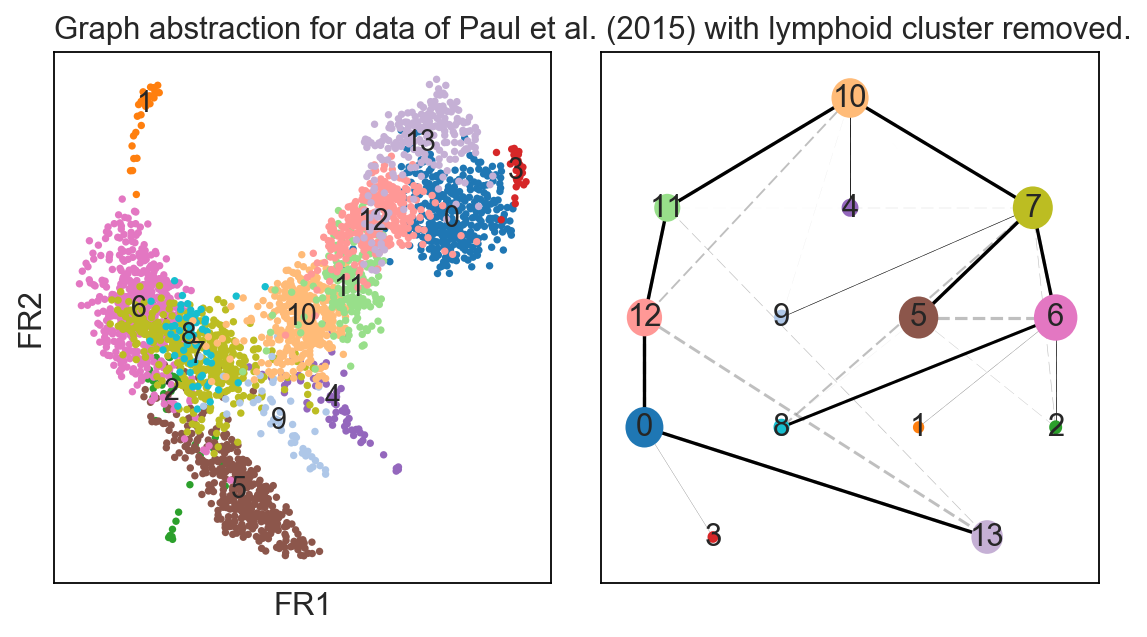

In [32]:
axs = sc.pl.aga(adata, root=10, basis='draw_graph_fr',
                color='aga_groups', groups_graph='aga_groups', layout='eq_tree', title='', show=False)
axs[0].set_title('Graph abstraction for data of Paul et al. (2015) with lymphoid cluster removed.', loc='left')
pl.savefig('./figures/aga_without_lymphoids.png')
pl.show()

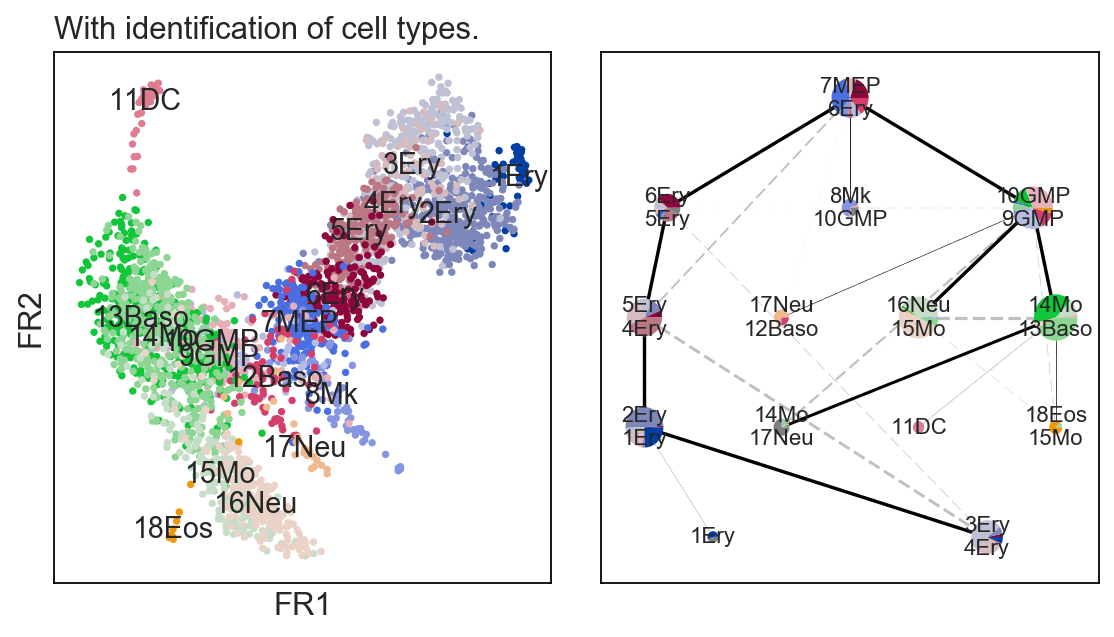

In [31]:
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='aga_groups', reference='paul15_clusters', normalization='reference')
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.default_26, asso_matrix)
axs = sc.pl.aga(adata, color='paul15_clusters', basis='draw_graph_fr', title='', palette=sc.pl.palettes.default_26,
                root=10, layout='eq_tree', 
                color_graph=asso_colors, groups_graph=asso_names,
                fontsize=10, show=False)
axs[0].set_title('With identification of cell types.', loc='left')
pl.savefig('./figures/aga_without_lymphoids_cell_types.png')
pl.show()

### Choose different resolutions for the Louvain clustering

Consider again the full dataset.

Choose a very low resolution.

In [4]:
adata = sc.read('paul15')
sc.tl.aga(adata, n_neighbors=4, resolution=0.5)

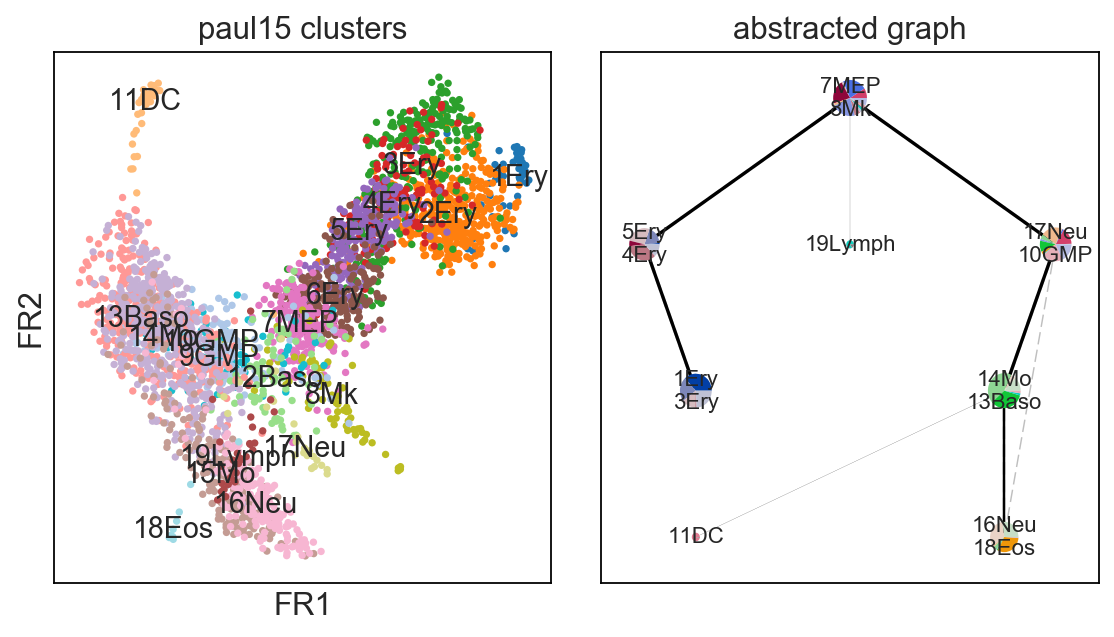

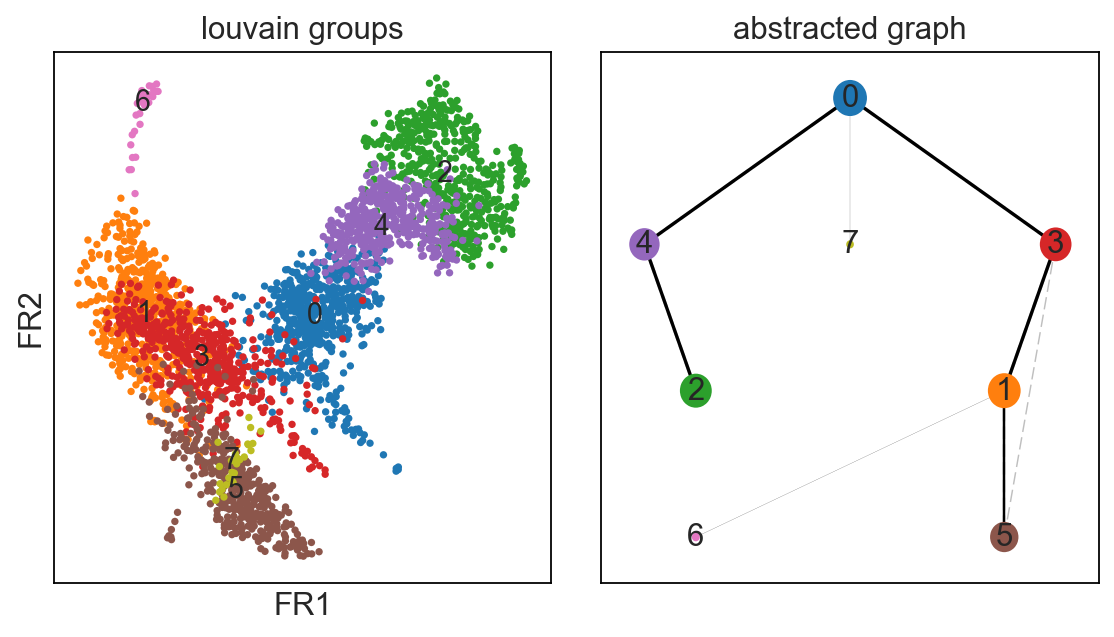

In [5]:
sc.settings.set_figure_params(dpi=80)
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='aga_groups', reference='paul15_clusters', normalization='reference')
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.default_26, asso_matrix)
axs = sc.pl.aga(adata, color='paul15_clusters', basis='draw_graph_fr', title_graph='abstracted graph',
                palette=sc.pl.palettes.default_26,
                root=4, layout='eq_tree', frameon=True,
                color_graph=asso_colors, groups_graph=asso_names,
                fontsize=10)
axs = sc.pl.aga(adata, root=4, layout='eq_tree', frameon=True,
                basis='draw_graph_fr', title_graph='abstracted graph')

Compare the agreement of the topology with the reference graph.

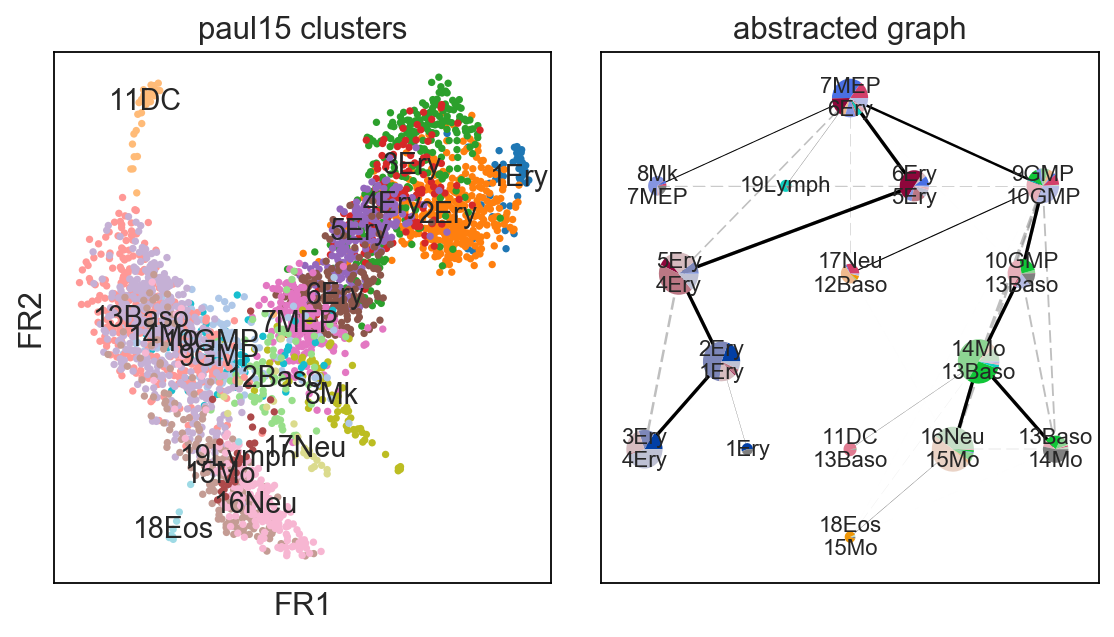

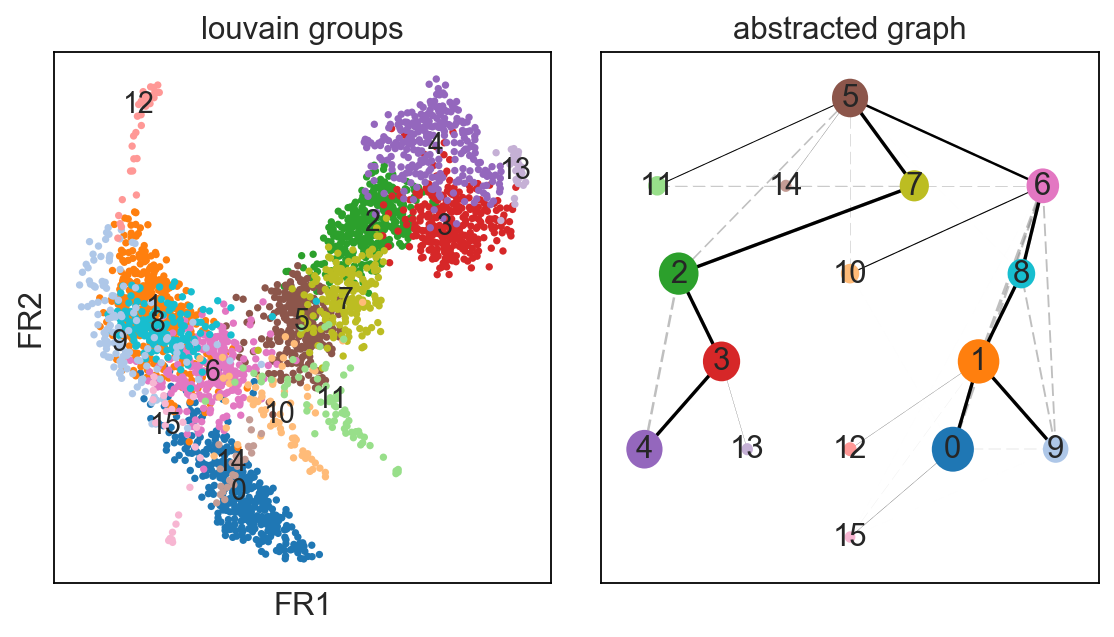

In [6]:
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata_reference, prediction='aga_groups', reference='paul15_clusters', normalization='reference')
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.default_26, asso_matrix)
axs = sc.pl.aga(adata_reference, color='paul15_clusters', basis='draw_graph_fr', title_graph='abstracted graph',
                layout='eq_tree', frameon=True,
                color_graph=asso_colors, groups_graph=asso_names,
                fontsize=10)
axs = sc.pl.aga(adata_reference, frameon=True, layout='eq_tree', basis='draw_graph_fr', title_graph='abstracted graph')

Comparing both trees by eye, one would say that they agree very well.

A sample logging output of the following code snippet, which quantifies the agreement, is 
```
leaf nodes in graph 1: ['1', '2', '3', '4', '7', '9', '11', '13']
compare shortest paths between leafs (12, 15) in graph1 and (6, 5) in graph2:
      path1 = ['12', '1', '0', '15'],
path_mapped = [['6', '1'], ['1', '3', '5'], ['5', '1'], ['5', '1']],
      path2 = ['6', '1', '5'],
-> n_agreeing_steps = 2 / n_steps = 2.
```

In [7]:
# sc.settings.verbosity = 5
result = sc.tl.aga_compare_paths(adata_reference, adata,
                                 adjacency_key='aga_adjacency_tree_confidence')
print(result)

aga_compare_paths_result(frac_steps=1.0, n_steps=76, frac_paths=1.0, n_paths=28)


Choose a pathologically high resolution.

In [17]:
adata = sc.read('paul15')
sc.tl.aga(adata, n_neighbors=4, resolution=2.4)

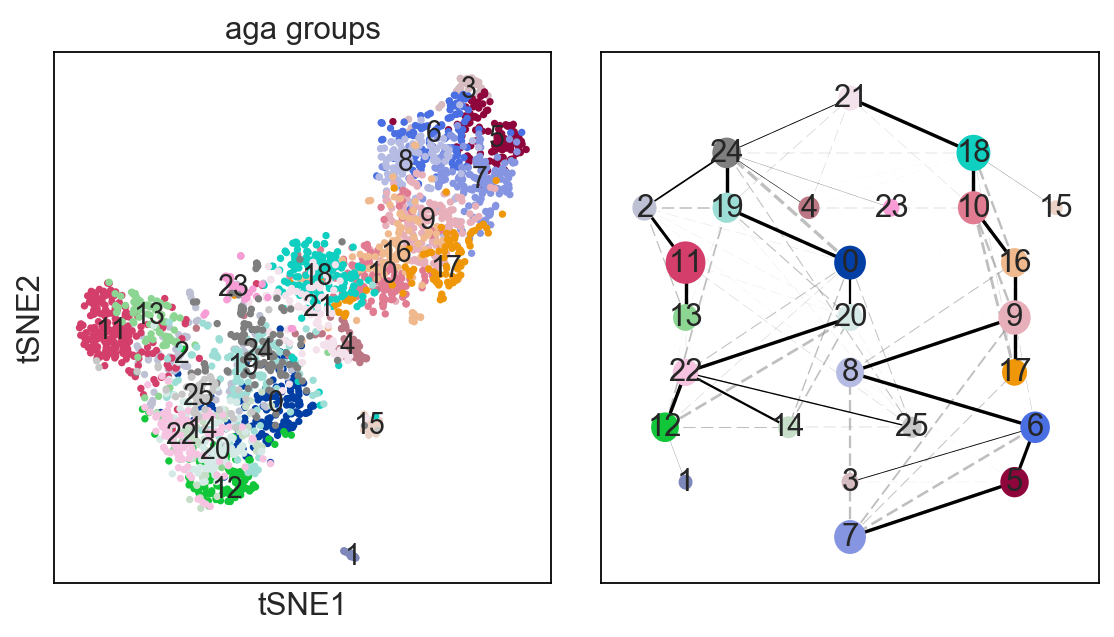

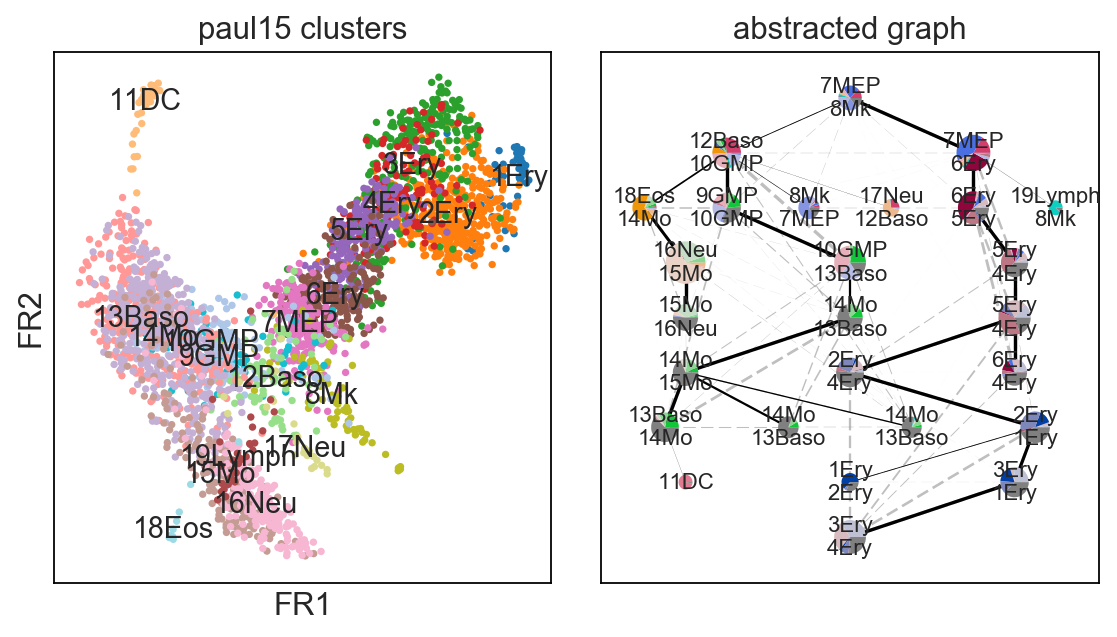

In [23]:
axs = sc.pl.aga(adata, root=21, color='aga_groups', groups_graph='aga_groups', layout='eq_tree', frameon=True)
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='aga_groups', reference='paul15_clusters', normalization='reference')
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.default_26, asso_matrix)
axs = sc.pl.aga(adata, color='paul15_clusters', basis='draw_graph_fr', title_graph='abstracted graph',
                root=21, layout='eq_tree', frameon=True,
                color_graph=asso_colors, groups_graph=asso_names,
                fontsize=10)

In [19]:
# sc.settings.verbosity = 5
result = sc.tl.aga_compare_paths(adata_reference, adata,
                                 adjacency_key='aga_adjacency_tree_confidence')
print(result)

aga_compare_paths_result(frac_steps=0.7388059701492538, n_steps=134, frac_paths=0.5357142857142857, n_paths=28)


## Sample over different input parameters

Here, we sample over many different input parameters.

In [14]:
sc.settings.verbosity = 1
statistics = OrderedDict([('nr. neighbors single-cell graph' , []), ('resolution louvain', []),
                          ('nr. louvain groups', []), ('total nr. steps in paths', []),
                          ('fraction of correct steps', []), ('fraction of correct paths', [])])
np.random.seed(0)
for i in range(100):
    n_neighbors = np.random.randint(3, 20)
    resolution = np.random.rand() * 3
    adata_new = sc.tl.aga(adata_reference, n_neighbors=n_neighbors, resolution=resolution, copy=True, recompute_graph=True)
    result = sc.tl.aga_compare_paths(adata_reference, adata_new, adjacency_key='aga_adjacency_tree_confidence')
    # uncomment for visualization or output
    # axs = sc.pl.aga(adata_new, basis='draw_graph_fr', layout='fr')
    # print('n_neighbors' , n_neighbors, 'resolution', resolution,
    #       'n_groups', len(adata_new.add['aga_groups_order']), 'frac_steps', result.frac_steps)
    statistics['nr. neighbors single-cell graph' ].append(n_neighbors)
    statistics['resolution louvain'].append(resolution)
    statistics['nr. louvain groups'].append(len(adata_new.add['aga_groups_order']))
    statistics['total nr. steps in paths'].append(result.n_steps)        
    statistics['fraction of correct steps'].append(result.frac_steps)
    statistics['fraction of correct paths'].append(result.frac_paths)

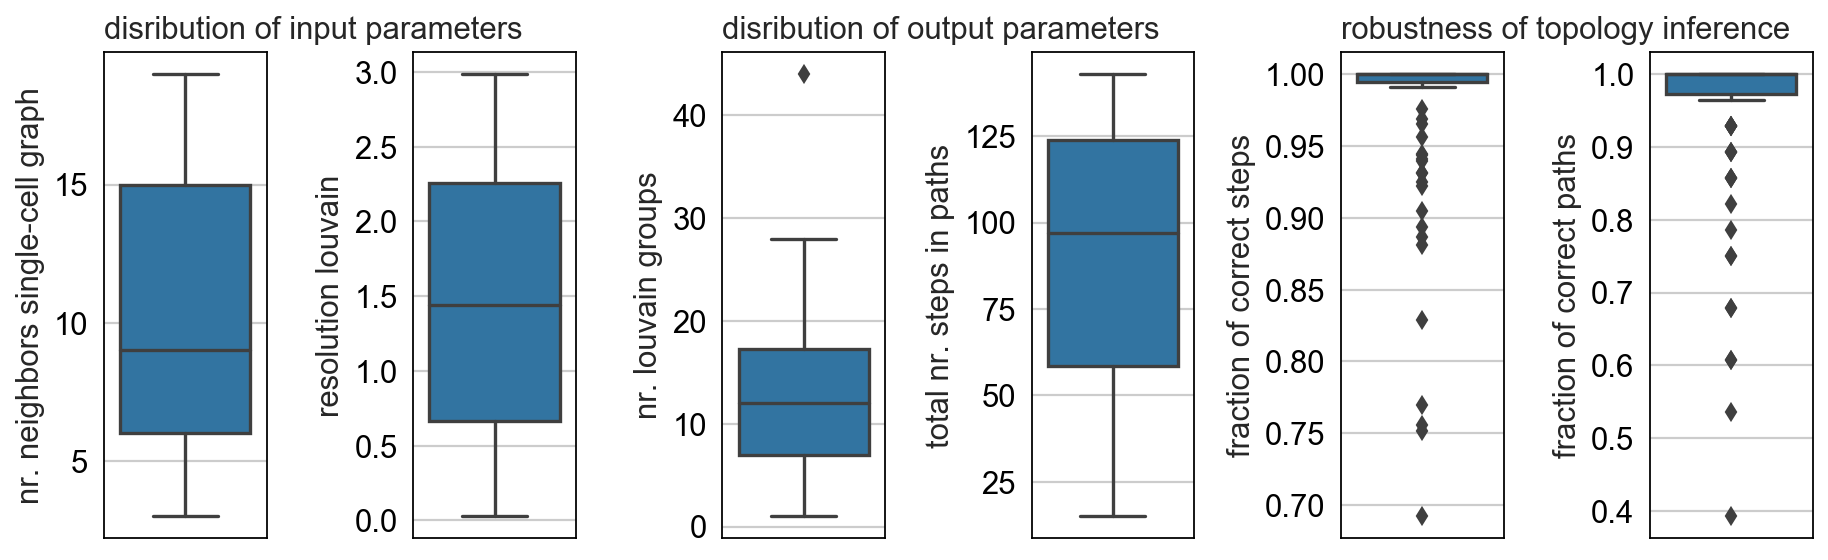

In [16]:
df = pd.DataFrame(statistics)
_, ax = pl.subplots(ncols=df.shape[1], figsize=(12, 4), gridspec_kw={'left': 0.07, 'wspace': 0.9})
for i, col in enumerate(df.columns):
    sns.boxplot(df[col], ax=ax[i], orient='vertical')
ax[0].set_title('distribution of input parameters', loc='left')
ax[2].set_title('distribution of output parameters', loc='left')
ax[4].set_title('robustness of topology inference', loc='left')
pl.savefig('./figures/robustness_summary.png', dpi=300)
pl.show()

### Robustness of greedy extremes detection of tree-like subgraph

In [24]:
sc.settings.verbosity = 1

statistics = OrderedDict([('nr. neighbors single-cell graph' , []), ('resolution louvain', []),
                          ('nr. louvain groups', []), ('total nr. steps in paths', []),
                          ('fraction of correct steps', []), ('fraction of correct paths', [])])
np.random.seed(0)
for i in range(100):
    n_neighbors = np.random.randint(3, 20)
    resolution = np.random.rand() * 3
    adata_new = sc.tl.aga(adata_reference, tree_detection='greedy extremes',
                          n_neighbors=n_neighbors, resolution=resolution, copy=True, recompute_graph=True)
    result = sc.tl.aga_compare_paths(adata_reference, adata_new, adjacency_key='aga_adjacency_tree_confidence')
    # uncomment for visualization or output
    # axs = sc.pl.aga(adata_new, basis='draw_graph_fr', layout='fr')
    # print('n_neighbors' , n_neighbors, 'resolution', resolution,
    #       'n_groups', len(adata_new.add['aga_groups_order']), 'frac_steps', result.frac_steps)
    statistics['nr. neighbors single-cell graph' ].append(n_neighbors)
    statistics['resolution louvain'].append(resolution)
    statistics['nr. louvain groups'].append(len(adata_new.add['aga_groups_order']))
    statistics['total nr. steps in paths'].append(result.n_steps)        
    statistics['fraction of correct steps'].append(result.frac_steps)
    statistics['fraction of correct paths'].append(result.frac_paths)

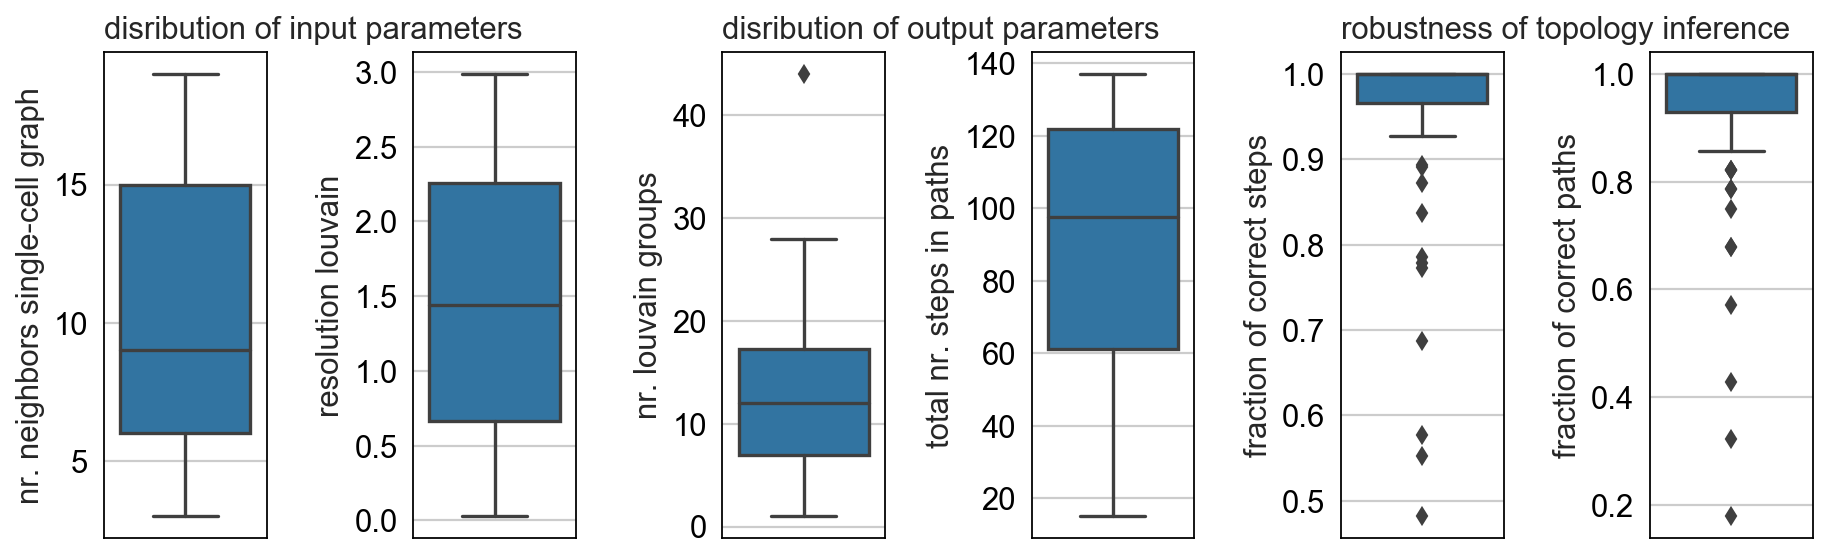

In [25]:
df = pd.DataFrame(statistics)
_, ax = pl.subplots(ncols=df.shape[1], figsize=(12, 4), gridspec_kw={'left': 0.07, 'wspace': 0.9})
for i, col in enumerate(df.columns):
    sns.boxplot(df[col], ax=ax[i], orient='vertical')
ax[0].set_title('distribution of input parameters', loc='left')
ax[2].set_title('distribution of output parameters', loc='left')
ax[4].set_title('robustness of topology inference', loc='left')
pl.show()

## Using iterative matching of extremal points

Study the same case as in Figure 1 by using iterative matching of extremal points.

In [4]:
adata = sc.read('paul15')
adata.add['iroot'] = np.flatnonzero(adata.smp['paul15_clusters']  == '7MEP')[0]
sc.tl.aga(adata,
          tree_detection='iterative_matching',
          n_neighbors=4,
          resolution=1.2)

reading ./write/paul15.h5


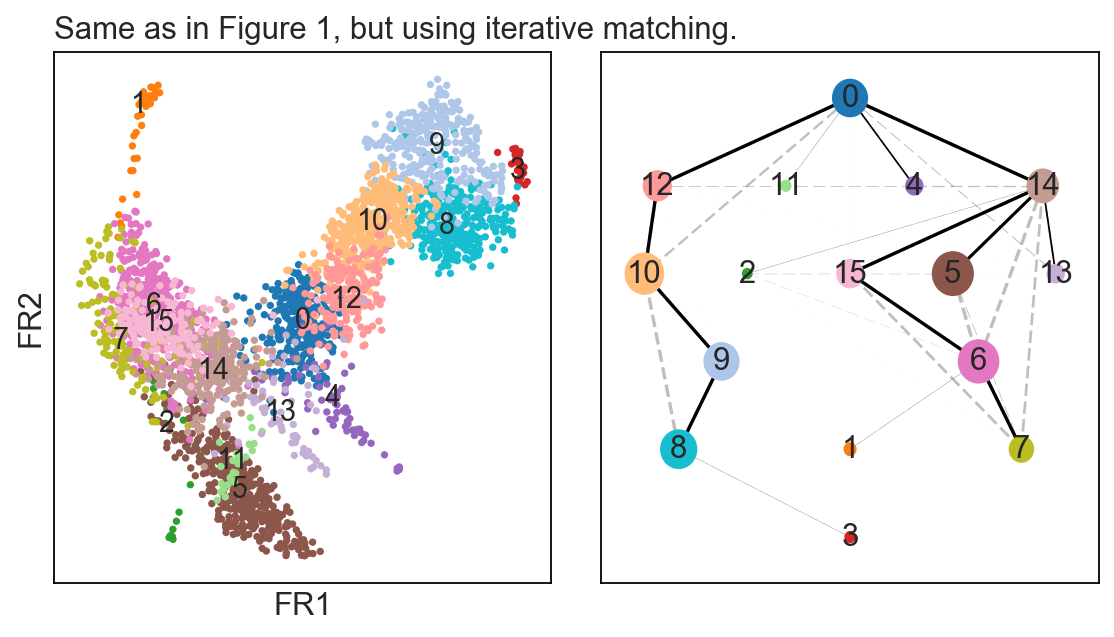

In [5]:
axs = sc.pl.aga(adata, title='', title_graph='',
                basis='draw_graph_fr',
                root=0, color='aga_groups', groups_graph='aga_groups', layout='eq_tree', show=False)
axs[0].set_title('Same as in Figure 1, but using iterative matching.', loc='left')
pl.savefig('./figures/aga_iterative_matching.png')
pl.show()

saving figure to file ./figures/aga_graph_iterative_matching.png


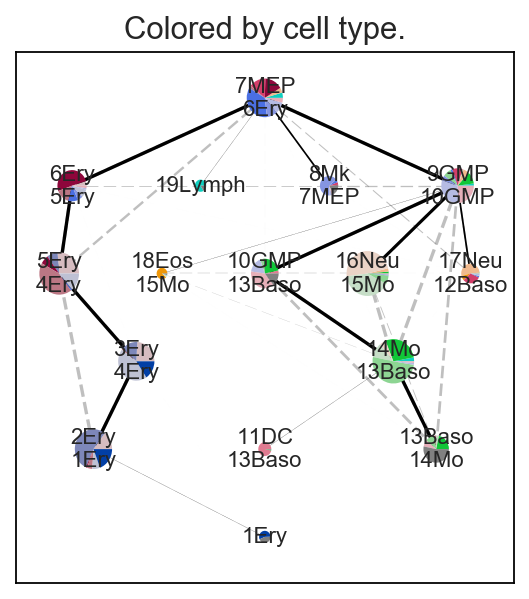

In [6]:
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='aga_groups', reference='paul15_clusters', normalization='reference')
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.default_26, asso_matrix)
ax = sc.pl.aga_graph(adata,
                     title='Colored by cell type.',
                     root=0, layout='eq_tree', frameon=True,
                     color=asso_colors, groups=asso_names,
                     fontsize=10, save='_iterative_matching')

Reconstructing the dynamics.

In [16]:
adata = sc.read('paul15')
adata_all_genes = sc.datasets.paul15_raw()
sc.pp.recipe_zheng17(adata_all_genes, n_top_genes=3000)
adata_all_genes.smp['aga_groups'] = adata.smp['aga_groups']
adata_all_genes.smp['aga_pseudotime'] = adata.smp['aga_pseudotime']

reading ./write/paul15.h5


In [17]:
gene_names = ['Gata2', 'Gata1', 'Hba-a2', 'Gfi1', 'Elane', 'Irf8', 'Csf1r']

reading ./write/paul15.h5


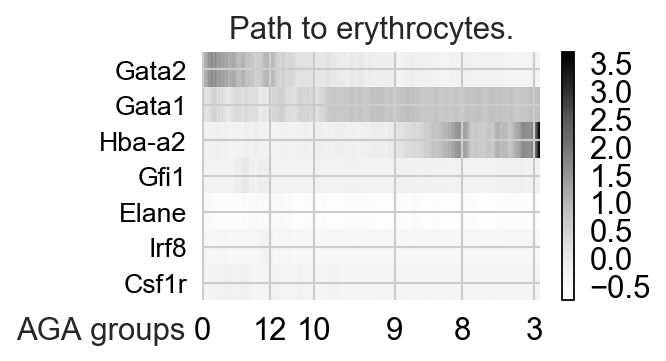

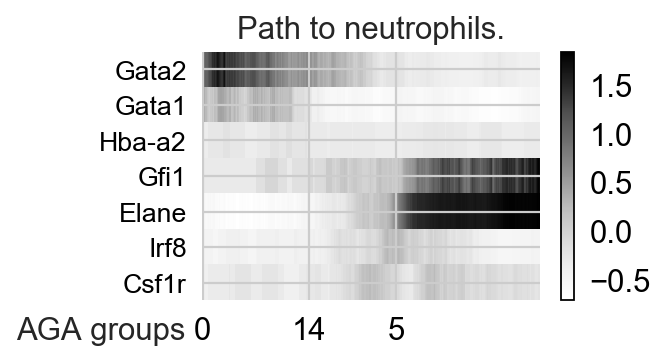

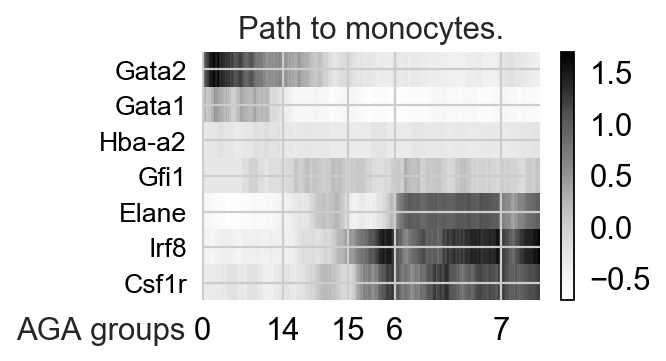

In [18]:
adata = sc.read('paul15')
paths = [('erythrocytes', [0, 12, 10, 9, 8, 3]), 
         ('neutrophils', [0, 14, 5]), 
         ('monocytes', [0, 14, 15, 6, 7])]
rcParams['figure.figsize'] = (4, 2.16)
rcParams['figure.subplot.top'] = 0.85
rcParams['figure.subplot.bottom'] = 0.13
for ipath, (descr, path) in enumerate(paths):
    ax = sc.pl.aga_path(adata_all_genes, left_margin=0.3,
                        nodes=path,
                        ytick_fontsize=12,
                        keys=gene_names,
                        n_avg=50,
                        title='Path to {}.'.format(descr),
                        normalize_to_zero_one=False, show=False)
    pl.savefig('./figures/aga_path_iterative_matching_{}.png'.format(descr))
    pl.show()
sc.pl.reset_rcParams()